In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Task 1: Exploratory Data Analysis (EDA)
df = pd.read_csv("G:\ExcelR\Data Science Assignments\Assignment 9\PCA\\wine.csv")
df.info()

# Displaying summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB

Summary statistics of the dataset:
             Type     Alcohol       Malic         Ash  Alcalinity   Mag

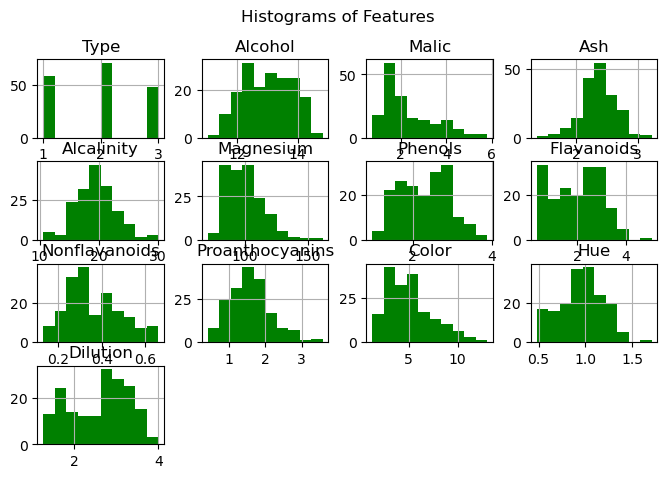

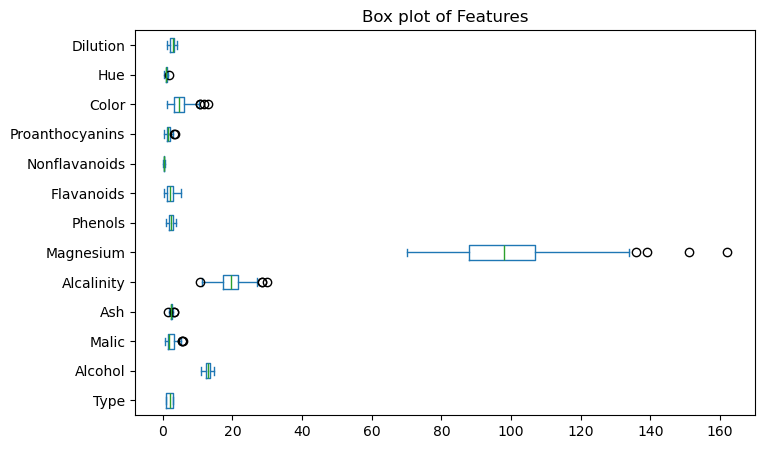

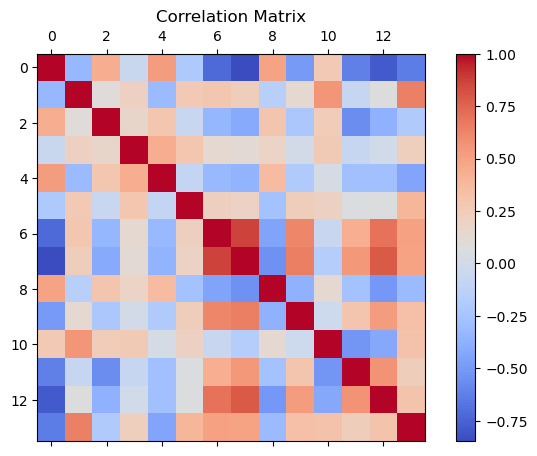

In [59]:
# 2. Examine the distribution of features using histograms, box plots, or density plots
feature_columns = df.columns[:-1]  # Assuming the last column as target variable
df[feature_columns].hist(figsize=(8, 5),color = 'green') #length,Height 
plt.suptitle('Histograms of Features')
plt.show()

# Box plot for each feature
df[feature_columns].plot(kind='box', vert=False, figsize=(8, 5)) #length,Height 
plt.title('Box plot of Features')
plt.show()

# 3. Investigate correlations between features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 5)) #length,Height 
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

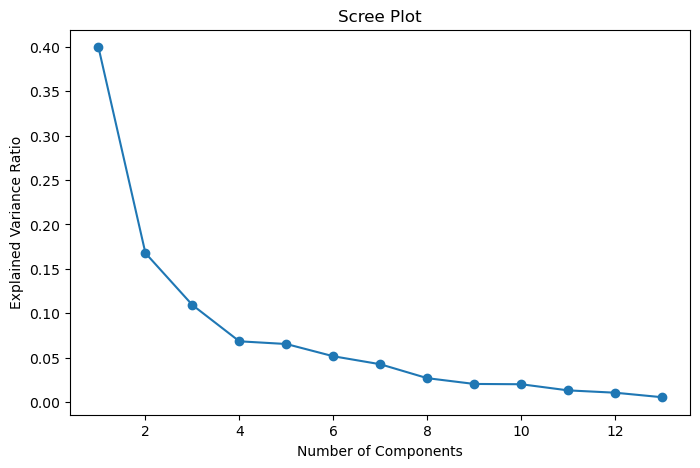

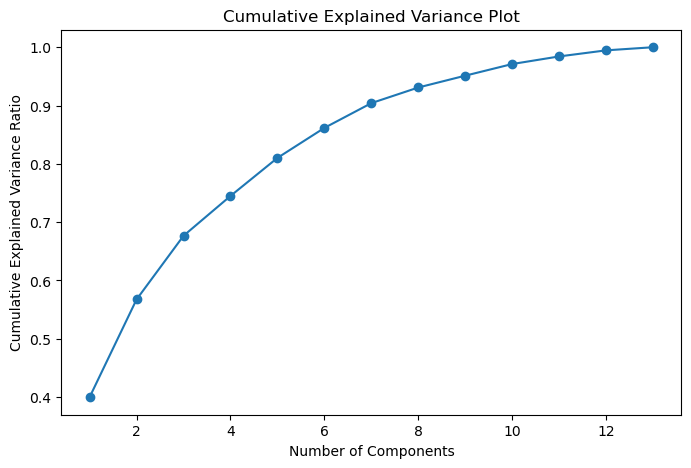

In [60]:
# Task 2: Dimensionality Reduction with PCA
# 1. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_columns])

# 2. Implementing PCA to reduce dimensionality
pca = PCA()
pca.fit(scaled_features)

# Determining the optimal number of principal components
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Scree plot
plt.figure(figsize=(8, 5)) #length,Height 
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(8, 5)) #length,Height 
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# Based on the plots, determine the optimal number of components
optimal_num_components = 2  # Adjust as needed

# 3. Transform the original dataset into the principal components
pca = PCA(n_components=optimal_num_components)
principal_components = pca.fit_transform(scaled_features)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


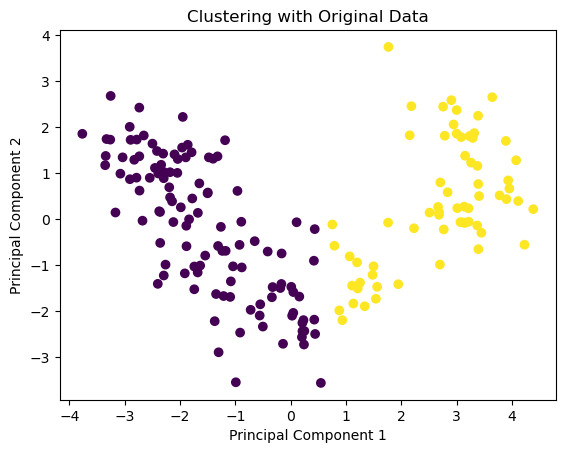

Silhouette Score (Original Data): 0.3016
Davies-Bouldin Index (Original Data): 1.3298


In [61]:
# Task 3: Clustering with Original Data
# 1. Apply K-means clustering to the original dataset
kmeans = KMeans(n_clusters=2)  # Adjust number of clusters as needed
cluster_labels = kmeans.fit_predict(scaled_features)

# 2. Visualizing clustering results
# Example plot (replace with appropriate visualization)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustering with Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 3. Evaluating clustering performance
silhouette_score_original = silhouette_score(scaled_features, cluster_labels)
davies_bouldin_score_original = davies_bouldin_score(scaled_features, cluster_labels)
print(f"Silhouette Score (Original Data): {silhouette_score_original.round(4)}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_score_original.round(4)}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


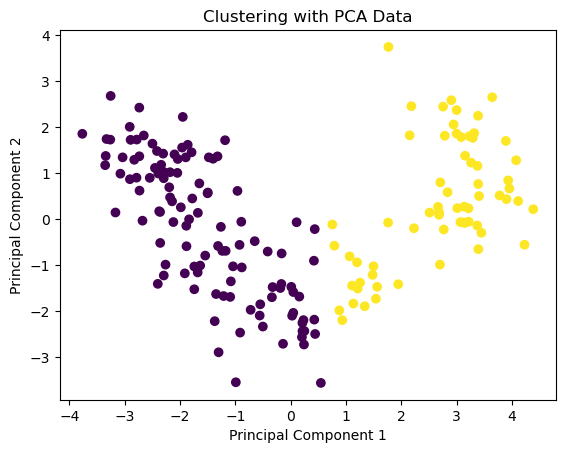

In [53]:
# Task 4: Clustering with PCA Data
# 1. Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=2)  # Adjust number of clusters as needed
cluster_labels_pca = kmeans_pca.fit_predict(principal_components)

# 2. Visualize clustering results from PCA-transformed data
# Example plot (replace with appropriate visualization)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels_pca, cmap='viridis')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [54]:
# Task 5: Comparison and Analysis
# 1. Compare clustering results from original dataset and PCA-transformed data
print("Comparison of Clustering Results:")
print("Original Data Cluster Labels:", cluster_labels)
print("PCA Data Cluster Labels:", cluster_labels_pca)

Comparison of Clustering Results:
Original Data Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
PCA Data Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
